In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision import transform
from fastai.callbacks import *

In [4]:
path = 'Mnist/'
tfms = get_transforms(do_flip=True)

In [15]:
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size = 224, bs = 32, test='test').normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (54000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: Mnist;

Valid: LabelList (6000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: Mnist;

Test: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: Mnist

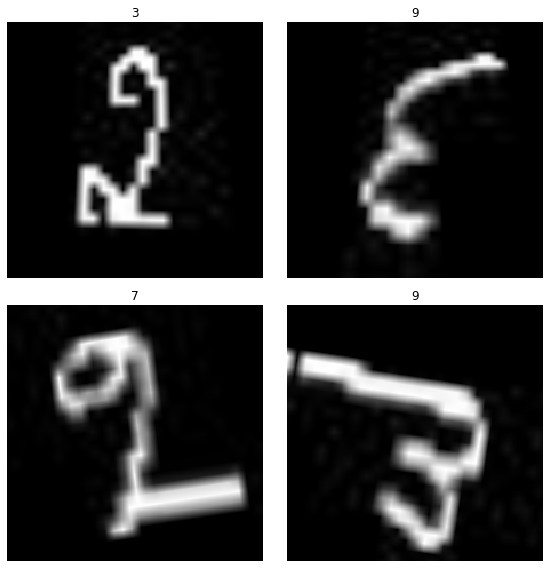

In [25]:
data.show_batch(2)

In [26]:
learn = cnn_learner(data, models.resnet18, metrics = [error_rate])
learn

Learner(data=ImageDataBunch;

Train: LabelList (54000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: Mnist;

Valid: LabelList (6000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: Mnist;

Test: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: Mnist, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), strid

epoch,train_loss,valid_loss,error_rate,time
0,0.388142,0.157746,0.051167,01:23
1,0.182587,0.083091,0.028000,01:17
2,0.122555,0.063626,0.017667,01:12
3,0.098488,0.038205,0.009667,01:16
4,0.097975,0.025718,0.008000,01:15
5,0.087512,0.028902,0.010167,01:14
6,0.047216,0.018831,0.005500,01:11


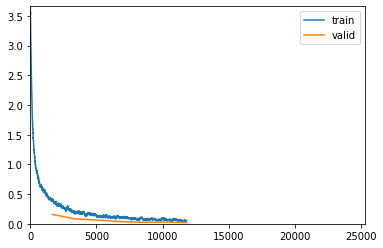

Better model found at epoch 0 with error_rate value: 0.05116666480898857.
Better model found at epoch 1 with error_rate value: 0.02800000086426735.
Better model found at epoch 2 with error_rate value: 0.017666665837168694.
Better model found at epoch 3 with error_rate value: 0.009666666388511658.
Better model found at epoch 4 with error_rate value: 0.00800000037997961.
Better model found at epoch 6 with error_rate value: 0.005499999970197678.


Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/home/andrey/Neural/neuralenv/lib/python3.7/site-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/home/andrey/Neural/neuralenv/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_pro

KeyboardInterrupt: 

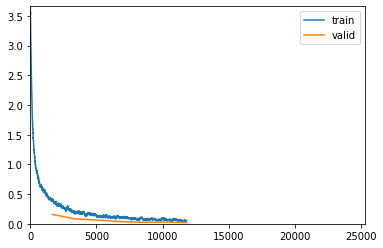

In [27]:
learn.fit_one_cycle(15,callbacks=[ShowGraph(learn),SaveModelCallback(learn, monitor='error_rate', mode='min')])

In [30]:
learn.save('../../Mnist/models/fastai.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


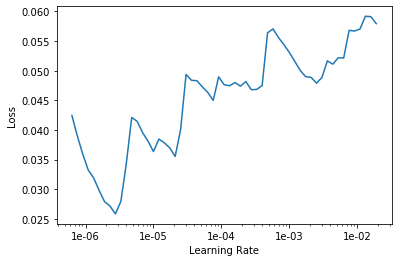

In [36]:
learn.load('../../Mnist/models/fastai.pth')
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.042224,0.016288,0.004833,01:23
1,0.031475,0.013785,0.004667,01:23
2,0.032599,0.012819,0.003500,01:23
3,0.037292,0.012860,0.004333,01:23


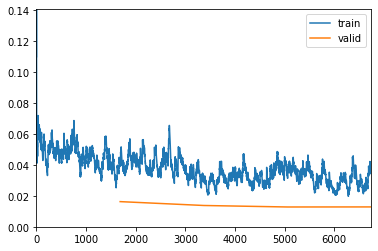

Better model found at epoch 0 with error_rate value: 0.004833333194255829.
Better model found at epoch 1 with error_rate value: 0.004666666500270367.
Better model found at epoch 2 with error_rate value: 0.0035000001080334187.


In [37]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(5e-9,9.6e-4), callbacks=[ShowGraph(learn),SaveModelCallback(learn, monitor='error_rate', mode='min')])

[('0', '1', 4),
 ('9', '6', 4),
 ('1', '0', 3),
 ('6', '7', 3),
 ('7', '3', 2),
 ('7', '6', 2)]

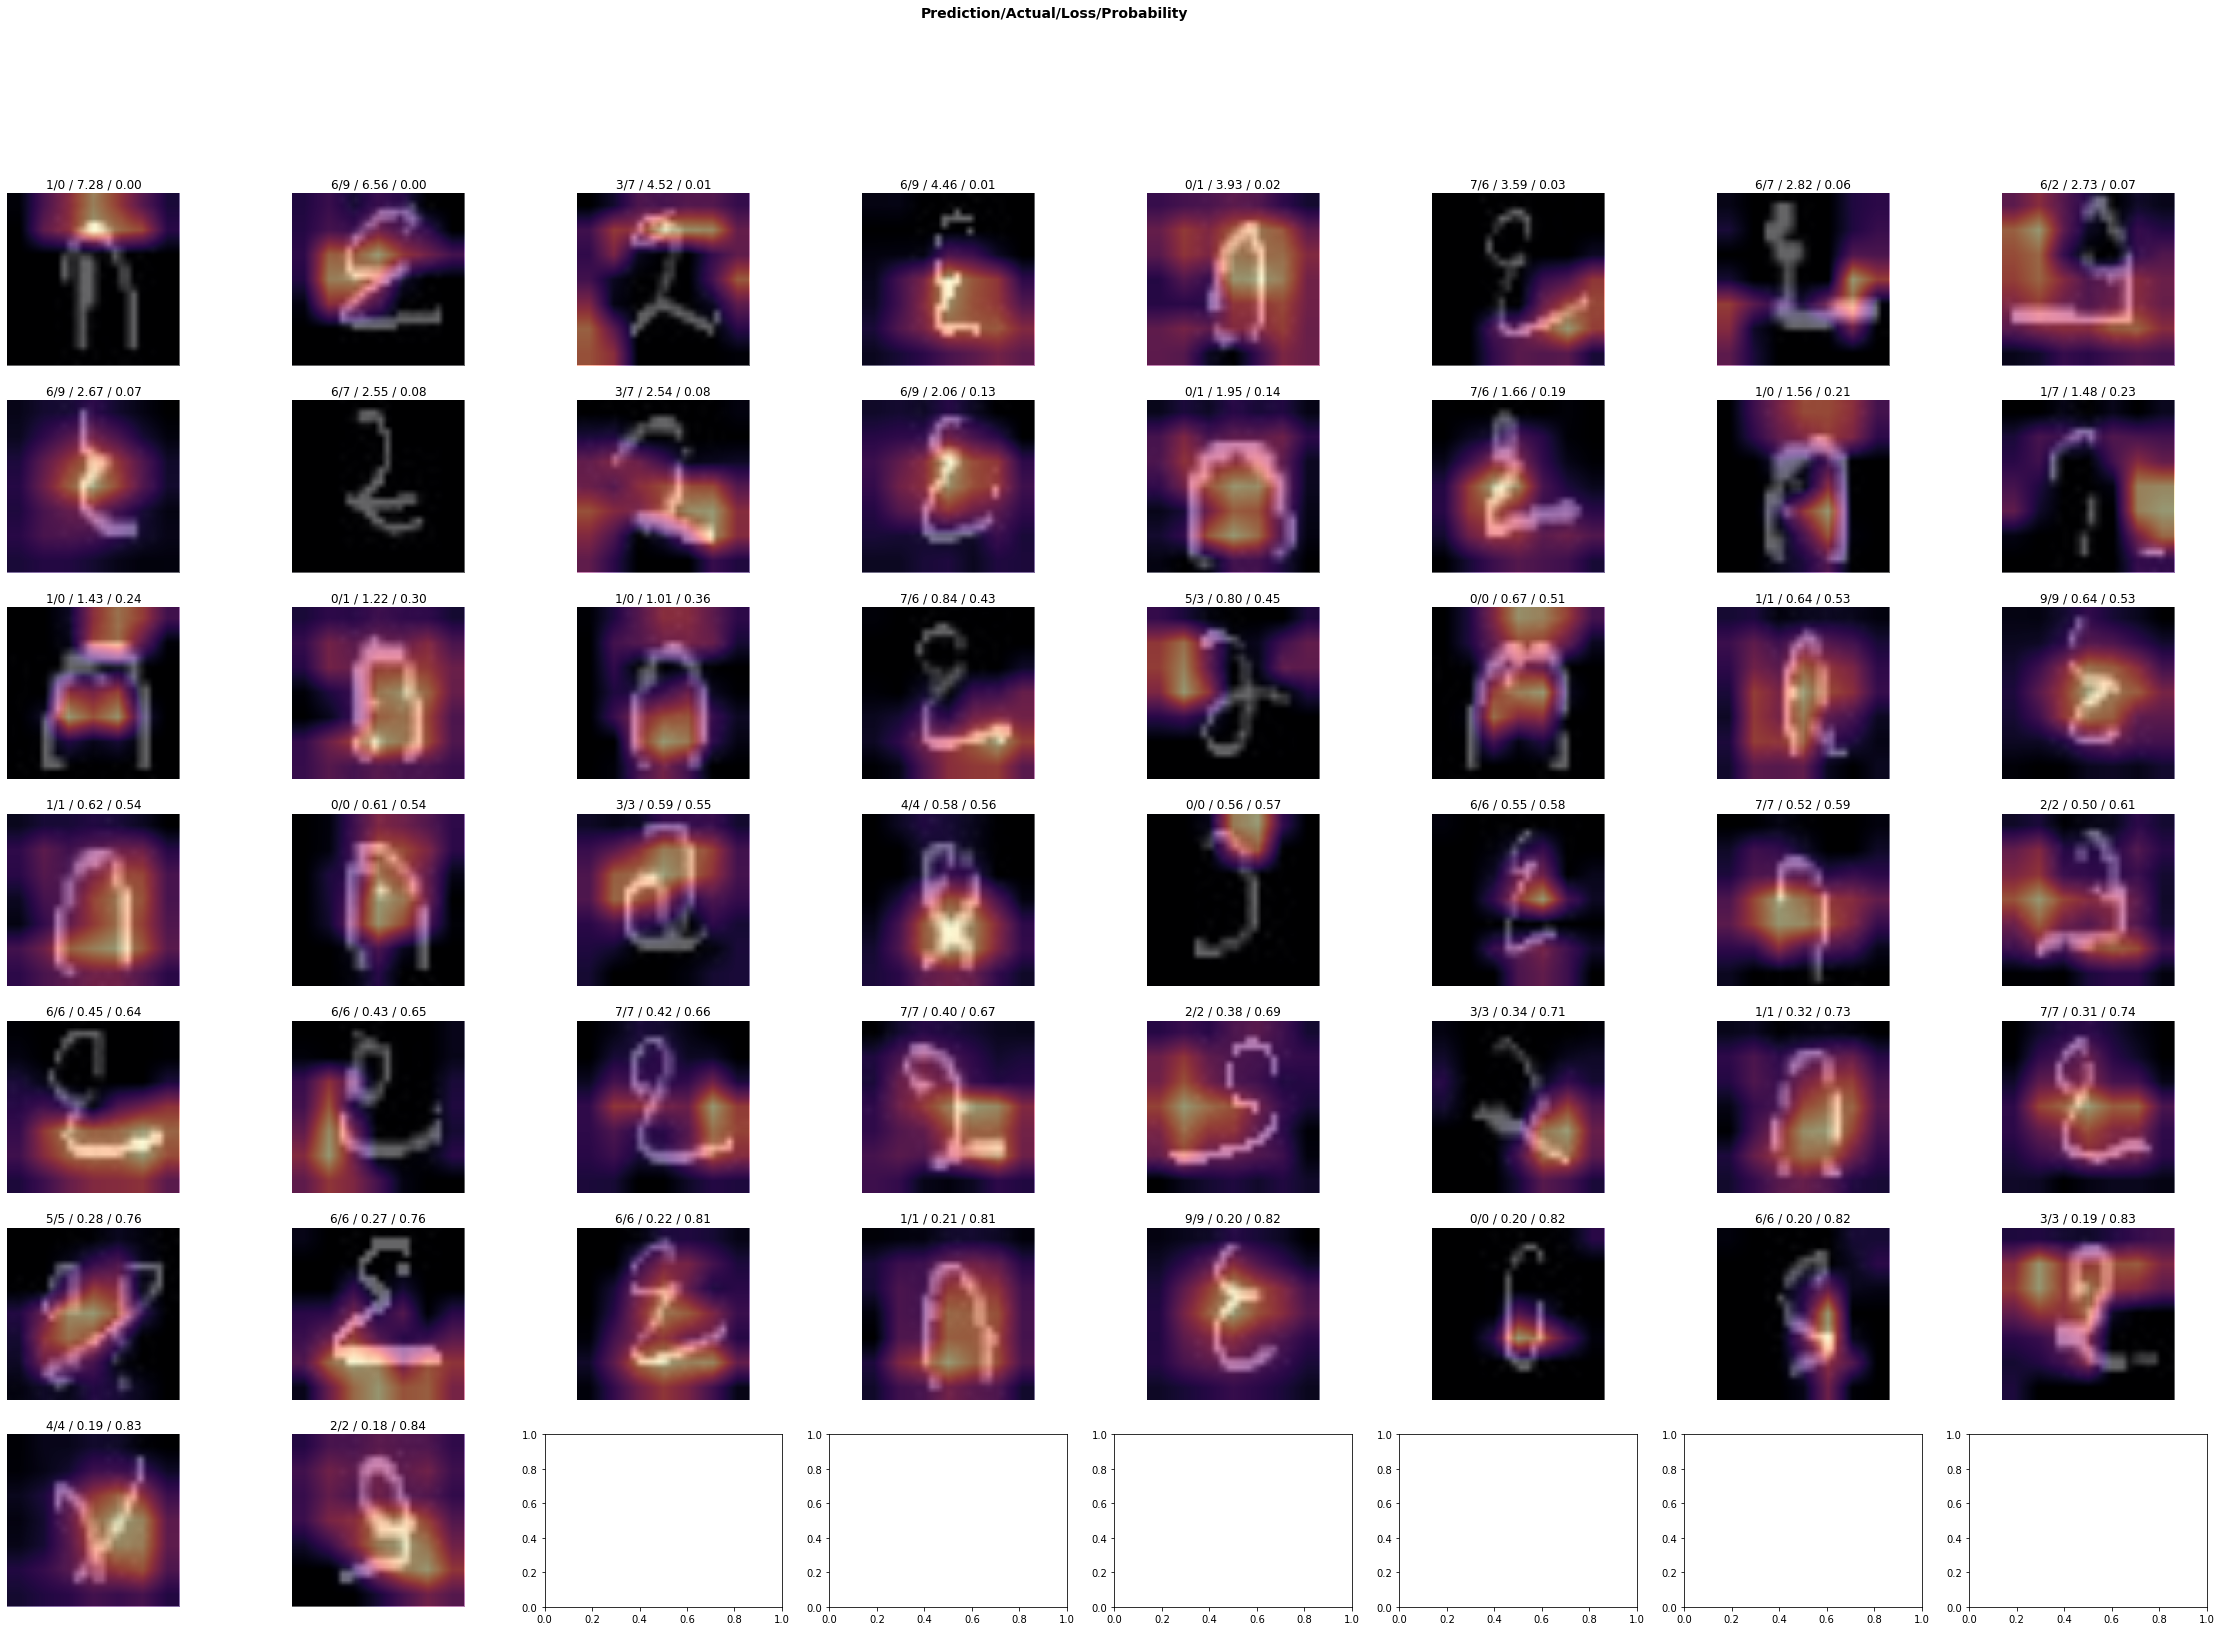

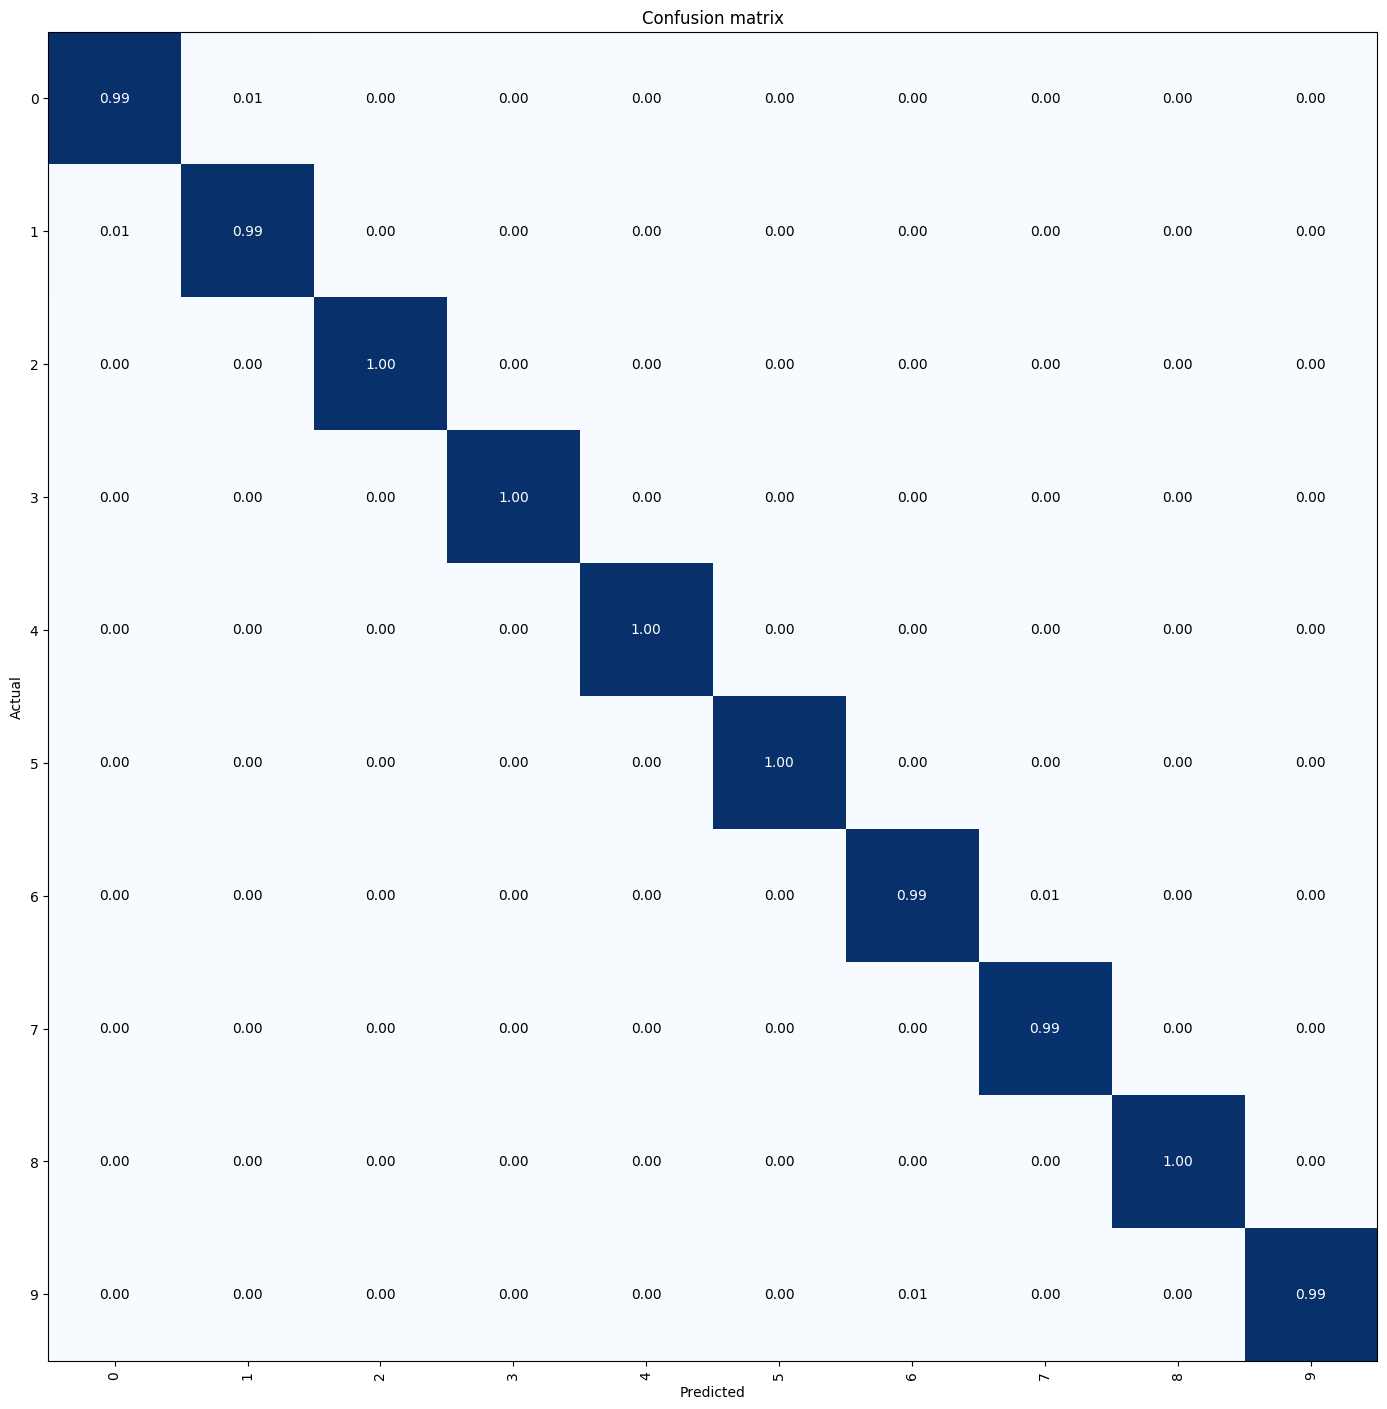

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(50, largest=True, figsize=(40,26), heatmap=True, show_text=True)
interp.plot_confusion_matrix(normalize=True, figsize=(14,14), dpi=100)
interp.most_confused(min_val=2)

In [75]:
learn.save('../../Mnist/models/fastai')
learn.export('../Mnist/models/fastai.pkl')